In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
dataframe=pd.read_csv("/content/spam.csv", encoding='latin-1')
dataframe.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
dataframe = dataframe.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
dataframe = dataframe.rename(columns={"v1":"Label", "v2":"Text"})
dataframe.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
X=dataframe["Text"]
y=dataframe["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13,
                                                    shuffle=True , stratify=y)
print(y.value_counts())

ham     4825
spam     747
Name: Label, dtype: int64


In [9]:
pipe = Pipeline(steps=[('vectorize', CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b')),
                       ('classifier', MultinomialNB())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('classifier', MultinomialNB())])

0.9847533632286996
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



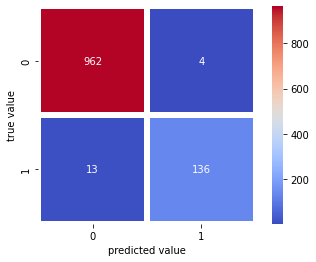

In [10]:
y_predict = pipe.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [11]:
SMS = [["You just won 50000 dollars worth cash prizes"],
       ["You can redeem 5000 dollars in cash"],
       ["I'll come within 5 minutes to meet you"],
       ["You just won 50 dollars to play games"],
       ["How are you doing my friend?"],
       ["You just won 50 dollars to have sex"],
       ["Greg, can you call me back once you get this?"],
       ["You just won 50 dollars to buy food"],
       ["Winner! To claim your gift call 0908878877"],
       ["Attend this free COVID webinar today: Book your session now"],
       ["Your online account has been locked. Please verify payment information"]]

for sms in SMS:
  print(pipe.predict(sms), sms)

['spam'] ['You just won 50000 dollars worth cash prizes']
['spam'] ['You can redeem 5000 dollars in cash']
['ham'] ["I'll come within 5 minutes to meet you"]
['spam'] ['You just won 50 dollars to play games']
['ham'] ['How are you doing my friend?']
['spam'] ['You just won 50 dollars to have sex']
['ham'] ['Greg, can you call me back once you get this?']
['ham'] ['You just won 50 dollars to buy food']
['spam'] ['Winner! To claim your gift call 0908878877']
['spam'] ['Attend this free COVID webinar today: Book your session now']
['spam'] ['Your online account has been locked. Please verify payment information']
